# Evaluation of IC and MPC


Evaluation of data acquired from control cascade in MoCap lab

    ref_types = ["spiral", "figure8"]
    ref_type = ref_types[1]
    speed = [0.6, 0.6, 0.3] #FINAL: 0.6
    space_spiral = [1.5, 1.0, 0.7]
    space_figure8 = [1.5, 1.5, 0.7]
    if ref_type == "spiral":
        reference = ReferenceTrajectory(curve=ref_type, space = space_spiral, tscale = speed)
    else:
        reference = ReferenceTrajectory(curve=ref_type, space = space_figure8, tscale = speed)

## Imports and Loading Data


In [227]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import pickle
import tikzplotlib as tplt
import glob
from uav_params import UAVParams


In [228]:
# load model data
save_plots = True
model_data_folder = "params"
models_file = ["lateral_crazyflie", "lateral_crazyflie"]#, "altitude_crazyflie"]
plot_label_font = 10
plot_legend_font = 10

# Load parameters of dynamics and cost function
models = []
for model_file in models_file:
    with open(model_data_folder+"/"+"ctrl_"+model_file+".pkl", 'rb') as infile:
        models.append(pickle.load(infile))

with open(model_data_folder+"/"+"ctrl_"+"attitude_crazyflie"+".pkl", 'rb') as infile:
    model_att = pickle.load(infile)
pass

# Load data from results folder
folder_results = 'results/cf_flight/'
folder_data = 'data/'
trajectories = ['spiral', 'figure8']
controllers = ['ic','eic','mpcmb']
# controllers = ['eic','mpcmb']
data = {}
dt_data = {}
time = {}
time_diff = {}
t_mission = 30.0
cf_data = {}
date_name = '2023-02-28-'
which_data = -1
for trajectory in trajectories:
    for controller in controllers:
        if trajectory=='figure8' and controller == 'mpcmb':
            which_data = 0
        else:
            which_data = -1
        # data = [state, ref, ctrl, cost, time]
        path = folder_results+folder_data+'log_controller_'+trajectory+'_'+controller+'_'+date_name
        data.setdefault(trajectory, {})[controller] = np.load(glob.glob(path+'*.npy')[which_data],
             allow_pickle=True)
        path_dt = folder_results+folder_data+'time_'+trajectory+'_'+controller+'_'+date_name
        dt_data.setdefault(trajectory, {})[controller] = np.load(
            glob.glob(path_dt+'*.npy')[which_data], allow_pickle=True)
        path_cf = folder_results + folder_data + 'cflib_log_'+trajectory+'_' + controller+'_'+date_name
        cf_data.setdefault(trajectory, {})[controller] = np.load(
            glob.glob(path_cf+'*.npz')[which_data], allow_pickle=True)
        path_time_traj = folder_results + folder_data + "time_traj_"+trajectory+'_'+controller+'_'+date_name
        t_temp = np.load(
            glob.glob(path_time_traj+'*.npy')[which_data], allow_pickle=True)
        time.setdefault(trajectory, {})[controller] = t_temp[1:]-t_temp[1]
        time_diff.setdefault(trajectory, {})[controller] = np.diff(t_temp)

colors_full = [(0.85000,0.32500,0.09800),(0.92900,0.69400,0.12500),(0.49400,0.18400,0.55600),(0.133333333,0.545098039,0.133333333)] # IC, eIC, MPC, MPCMB
colors = [(0.85000,0.32500,0.09800),(0.92900,0.69400,0.12500),(0.133333333,0.545098039,0.133333333)] # IC, eIC, MPC, MPCMB
ref_color = (0.121568627451,0.466666666667,0.705882352941)
colors_time = [(0.133333333,0.545098039,0.133333333),(0.85000,0.32500,0.09800),(0.92900,0.69400,0.12500)] # different order # MPC, MPCMB, IC, eIC

## Distribution of Invariant Sets

Picture of set given by state constraints, invariant set of low gain controller, and high gain controller.

Order: y and z-axis controller


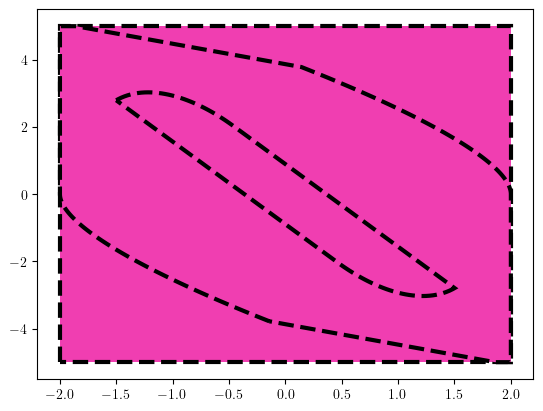

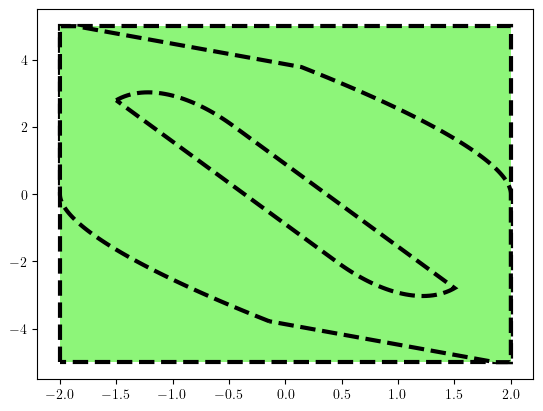

In [229]:
for model in models:
    model.plot_sets()

## Plots

### plot with reference and UAV position for spiral/ellipse and figure8 reference trajectory

In [230]:
def save_plot(path, noise = False):
    tplt.clean_figure()
    tplt.save(path+'.tex')
    if noise:
        path = path+'_noise'
    plt.legend(fontsize=plot_legend_font)
    plt.savefig(path+'.pdf',bbox_inches="tight")
    plt.show()
    # plt.savefig(path+'.tex',format="pgf")

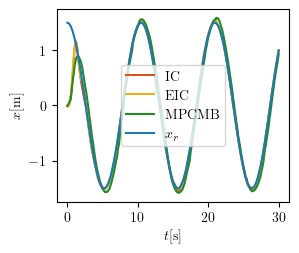

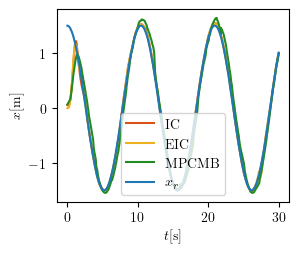

In [231]:
for trajectory in trajectories:
    fig = plt.figure(figsize=(3,2.5))
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    for i, controller in enumerate(controllers):
        plt.plot(time[trajectory][controller], data[trajectory][controller][0][0, 0, :], label=controller.upper(), color = colors[i])
    plt.plot(time[trajectory][controllers[0]], data[trajectory][controllers[0]][1][0, :], label=r'$x_r$', color = ref_color)
    plt.xlabel(r'$t\mathrm{[s]}$', fontsize=plot_label_font)
    plt.ylabel(r'$x\mathrm{[m]}$', fontsize=plot_label_font)
    if save_plots:
        save_plot(folder_results+'plots/x_'+trajectory)
    else:
        plt.legend()
        plt.show()

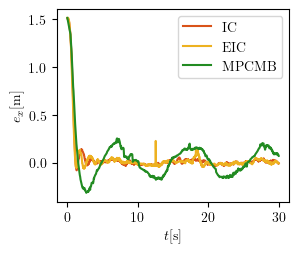

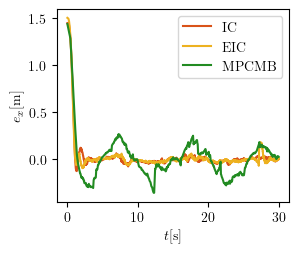

In [232]:
for trajectory in trajectories:
    fig = plt.figure(figsize=(3,2.5))
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    for i, controller in enumerate(controllers):
        plt.plot(time[trajectory][controller], data[trajectory][controller][1][0, :]-data[trajectory][controller][0][0,0, :], label=controller.upper(), color = colors[i])
    plt.xlabel(r'$t\mathrm{[s]}$', fontsize=plot_label_font)
    plt.ylabel(r'$e_x\mathrm{[m]}$', fontsize=plot_label_font)
    if save_plots:
        save_plot(folder_results+'plots/e_x_'+trajectory)
    else:
        plt.legend()
        plt.show()

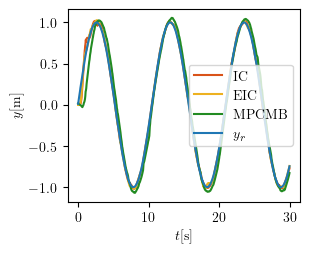

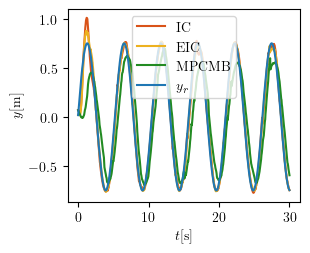

In [233]:
for trajectory in trajectories:
    fig = plt.figure(figsize=(3,2.5))
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    for i, controller in enumerate(controllers):
        plt.plot(time[trajectory][controller], data[trajectory][controller][0][0,1, :], label=controller.upper(), color = colors[i])
    plt.plot(time[trajectory][controllers[0]], data[trajectory][controllers[0]][1][1, :], label=r'$y_r$', color = ref_color)
    plt.xlabel(r'$t\mathrm{[s]}$', fontsize=plot_label_font)
    plt.ylabel(r'$y\mathrm{[m]}$', fontsize=plot_label_font)
    if save_plots:
        save_plot(folder_results+'plots/y_'+trajectory)
    else:
        plt.legend()
        plt.show()

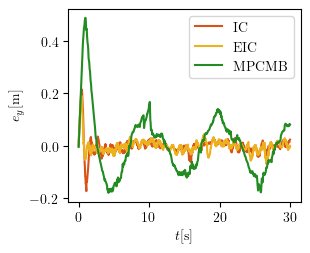

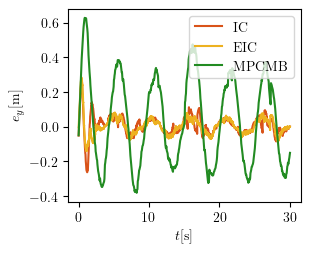

In [234]:
for trajectory in trajectories:
    fig = plt.figure(figsize=(3,2.5))
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    for i, controller in enumerate(controllers):
        plt.plot(time[trajectory][controller], data[trajectory][controller][1][1, :]-data[trajectory][controller][0][0,1, :], label=controller.upper(), color = colors[i])
    plt.xlabel(r'$t\mathrm{[s]}$', fontsize=plot_label_font)
    plt.ylabel(r'$e_y\mathrm{[m]}$', fontsize=plot_label_font)
    if save_plots:
        save_plot(folder_results+'plots/e_y_'+trajectory)
    else:
        plt.legend()
        plt.show()

### plot with UAV velocity for spiral/ellipse and figure8 reference trajectory

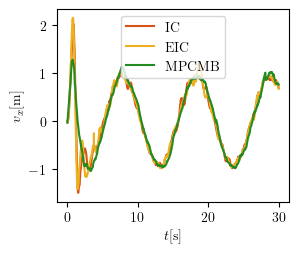

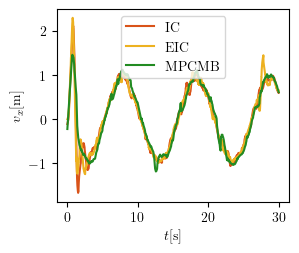

In [235]:
for trajectory in trajectories:
    fig = plt.figure(figsize=(3,2.5))
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    for i, controller in enumerate(controllers):
        plt.plot(time[trajectory][controller], data[trajectory][controller][0][0,4, :], label=controller.upper(), color = colors[i])
    plt.xlabel(r'$t\mathrm{[s]}$', fontsize=plot_label_font)
    plt.ylabel(r'$v_x\mathrm{[m]}$', fontsize=plot_label_font)
    if save_plots:
        save_plot(folder_results+'plots/vx_'+trajectory)
    else:
        plt.legend()
        plt.show()

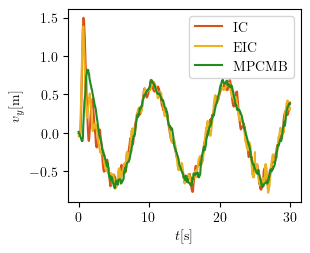

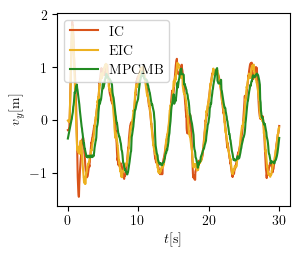

In [236]:
for trajectory in trajectories:
    fig = plt.figure(figsize=(3,2.5))
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    for i, controller in enumerate(controllers):
        plt.plot(time[trajectory][controller], data[trajectory][controller][0][0,5, :], label=controller.upper(), color = colors[i])
    plt.xlabel(r'$t\mathrm{[s]}$', fontsize=plot_label_font)
    plt.ylabel(r'$v_y\mathrm{[m]}$', fontsize=plot_label_font)
    if save_plots:
        save_plot(folder_results+'plots/vy_'+trajectory)
    else:
        plt.legend()
        plt.show()

### path of UAV for spiral/ellipse and figure8 reference trajectory

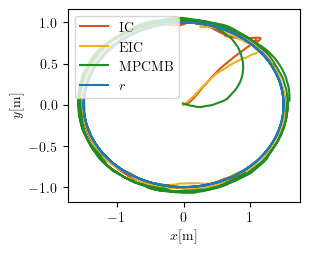

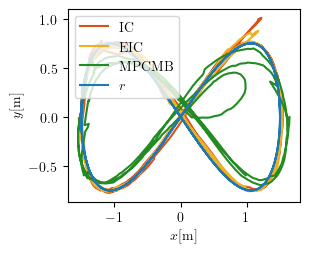

In [237]:
for trajectory in trajectories:
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    plt.figure(figsize=(3,2.5))
    for i, controller in enumerate(controllers):
        plt.plot(data[trajectory][controller][0][0, 0, :],
             data[trajectory][controller][0][0, 1, :], label=controller.upper(), color = colors[i])
    plt.plot(data[trajectory][controllers[0]][1][0, :],
             data[trajectory][controllers[0]][1][1, :], label='$r$', color = ref_color)
    plt.xlabel(r'$x\mathrm{[m]}$', fontsize=plot_label_font)
    plt.ylabel(r'$y\mathrm{[m]}$', fontsize=plot_label_font)
    if save_plots:
        tplt.clean_figure()
        tplt.save(folder_results+'plots/traj_xy_'+trajectory+'.tex')
        plt.legend(loc='upper left', fontsize=plot_legend_font)
        plt.savefig(folder_results+'plots/traj_xy_'+trajectory+'.pdf',bbox_inches="tight")
        plt.show()
        # save_plot(folder_results+'plots/traj_xy_'+trajectory)
    else:
        plt.legend()
        plt.show()


### Ouput of controllers

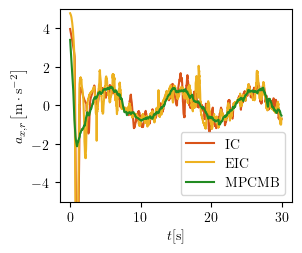

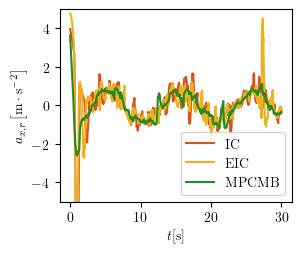

In [238]:
for trajectory in trajectories:
    # plot with control actions
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    plt.figure(figsize=(3,2.5))
    for i, controller in enumerate(controllers):
        plt.plot(time[trajectory][controller], data[trajectory][controller][2][0, :], label=controller.upper(), color = colors[i])
    plt.xlabel(r'$t\mathrm{[s]}$', fontsize=plot_label_font)
    axes = plt.gca()
    axes.set_ylim([-5,5])
    plt.ylabel(r'$a_{x,r}\mathrm{\left[m\cdot s^{-2}\right]}$', fontsize=plot_label_font)
    if save_plots:
        save_plot(folder_results+'plots/acc_x_'+trajectory)
    else:
        plt.legend()
        plt.show()

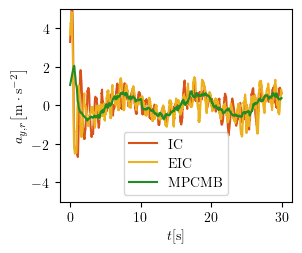

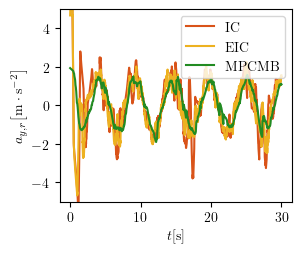

In [239]:
for trajectory in trajectories:
    # plot with control actions
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    plt.figure(figsize=(3,2.5))
    for i, controller in enumerate(controllers):
        plt.plot(time[trajectory][controller], data[trajectory][controller][2][1, :], label=controller.upper(), color = colors[i])
    axes = plt.gca()
    axes.set_ylim([-5,5])
    plt.xlabel(r'$t\mathrm{[s]}$', fontsize=plot_label_font)
    plt.ylabel(r'$a_{y,r}\mathrm{\left[m\cdot s^{-2}\right]}$', fontsize=plot_label_font)
    if save_plots:
        save_plot(folder_results+'plots/acc_y_'+trajectory)
    else:
        plt.legend()
        plt.show()

### Time needed to solve LP/QP

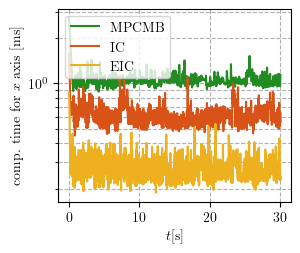

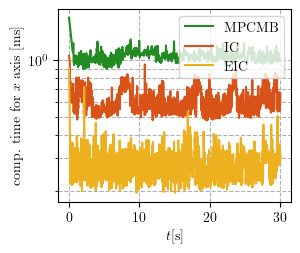

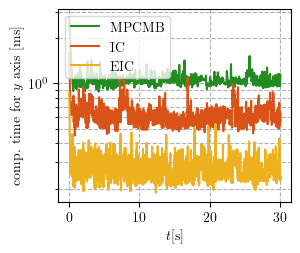

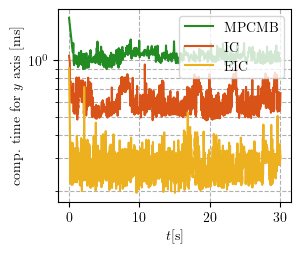

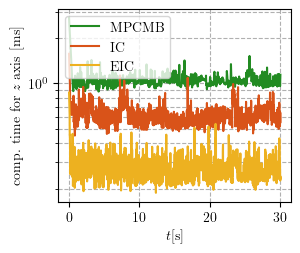

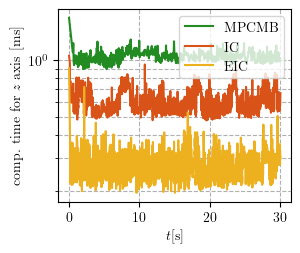

In [240]:
controllers_time = ['mpcmb','ic','eic'] # to draw in correct order because of overlapping
names = ['x','y','z']
for i, name in enumerate(names):
    for trajectory in trajectories:
        plt.rc('text', usetex=True)
        plt.rc('font', family='serif')
        plt.figure(figsize=(3,2.5))
        for controller, color in zip(controllers_time,colors_time):
            idx = np.where(data[trajectory][controller][4][0,:] != None)
            data_temp = data[trajectory][controller][4][0,:].copy()
            data_temp[idx] = data_temp[idx]*1e3
            plt.plot(time[trajectory][controller], data_temp, label=controller.upper(), color = color)
        plt.yscale('log')
        plt.grid(True, which="both", linestyle='--')
        plt.xlabel(r'$t\mathrm{[s]}$', fontsize=plot_label_font)
        plt.ylabel(r'comp. time for $'+name+'$ axis $\mathrm{[ms]}$', fontsize=plot_label_font)
        if save_plots:
            save_plot(folder_results+'plots/time_'+name+'_'+trajectory)
        else:
            plt.legend()
            plt.show()

#### Sum of both periods

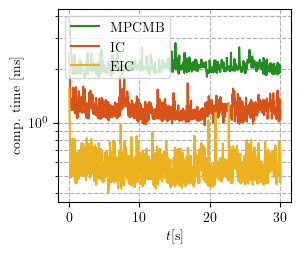

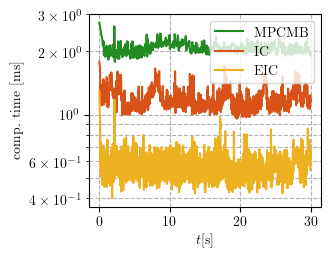

In [241]:
for trajectory in trajectories:
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    plt.figure(figsize=(3,2.5))
    for controller, color in zip(controllers_time,colors_time):
        idx = np.where(data[trajectory][controller][4][0,:] != None)
        data_temp = data[trajectory][controller][4][0,:].copy()
        data_temp2 = data[trajectory][controller][4][1,:].copy()
        data_temp2[idx] = data_temp2[idx]*1e3 + data_temp[idx]*1e3
        data_temp2 = np.where(data_temp2 < 1e-2, np.nan, data_temp2)
        plt.plot(time[trajectory][controller], data_temp2, label=controller.upper(), color = color)
    plt.yscale('log')
    plt.grid(True, which="both", linestyle='--')
    plt.xlabel(r'$t$[s]', fontsize=plot_label_font)
    plt.ylabel(r'comp. time [ms]', fontsize=plot_label_font)
    if save_plots:
        save_plot(folder_results+'plots/time_sum_'+trajectory)
    else:
        plt.legend()
        plt.show()

### Time needed for control cascade to acquire control action

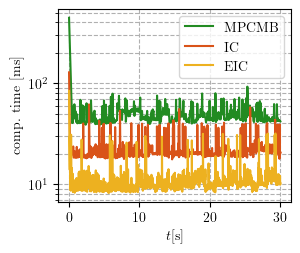

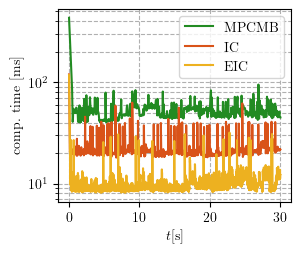

In [242]:
controllers_time = ['mpcmb','ic','eic'] # to draw in correct order because of overlapping

for trajectory in trajectories:
    colors = [(0.133333333,0.545098039,0.133333333),(0.85000,0.32500,0.09800),(0.92900,0.69400,0.12500)]
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    plt.figure(figsize=(3,2.5))
    for controller, color in zip(controllers_time,colors):
        plt.plot(time[trajectory][controller], dt_data[trajectory][controller]*1e3, label=controller.upper(), color = color)
    plt.yscale('log')
    plt.grid(True, which="both", linestyle='--')
    plt.xlabel(r'$t$[s]', fontsize=plot_label_font)
    plt.ylabel(r'comp. time [ms]', fontsize=plot_label_font)
    if save_plots:
        save_plot(folder_results+'plots/time_full_'+trajectory)
    else:
        plt.legend()
        plt.show()

### Interpolating coefficient

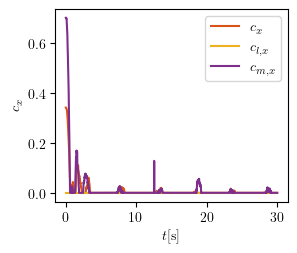

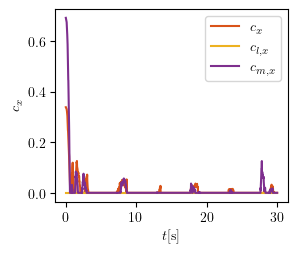

In [243]:
# plot with reference trajectory
for trajectory in trajectories:
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    plt.figure(figsize=(3,2.5))
    plt.plot(time[trajectory][controllers[0]], data[trajectory][controllers[0]][3][0, :], label=r'$c_x$', color = colors_full[0])
    plt.plot(time[trajectory][controllers[1]], data[trajectory][controllers[1]][3][0, 0, :], label=r'$c_{l,x}$', color = colors_full[1])
    plt.plot(time[trajectory][controllers[1]], data[trajectory][controllers[1]][3][1, 0, :], label=r'$c_{m,x}$', color = colors_full[2])
    plt.xlabel(r'$t$[s]', fontsize=plot_label_font)
    plt.ylabel(r'$c_x$', fontsize=plot_label_font)
    if save_plots:
        save_plot(folder_results+'plots/c_x_'+trajectory)
    else:
        plt.legend()
        plt.show()

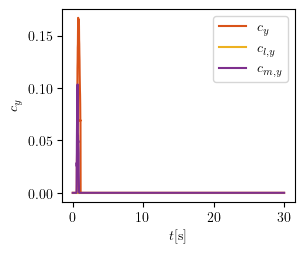

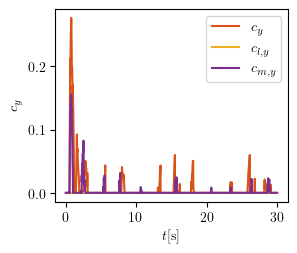

In [244]:
# plot with reference trajectory
for trajectory in trajectories:
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    plt.figure(figsize=(3,2.5))
    plt.plot(time[trajectory][controllers[0]], data[trajectory][controllers[0]][3][1, :], label=r'$c_y$', color = colors_full[0])
    plt.plot(time[trajectory][controllers[1]], data[trajectory][controllers[1]][3][0, 1, :], label=r'$c_{l,y}$', color = colors_full[1])
    plt.plot(time[trajectory][controllers[1]], data[trajectory][controllers[1]][3][1, 1, :], label=r'$c_{m,y}$', color = colors_full[2])
    plt.xlabel(r'$t$[s]', fontsize=plot_label_font)
    plt.ylabel(r'$c_y$', fontsize=plot_label_font)
    if save_plots:
        save_plot(folder_results+'plots/c_y_'+trajectory)
    else:
        plt.legend()
        plt.show()

### Value of criterion from MPCs

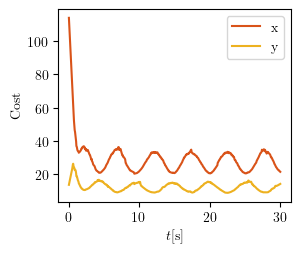

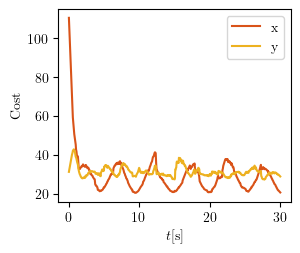

In [245]:
for trajectory in trajectories:
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    plt.figure(figsize=(3,2.5))
    plt.plot(time[trajectory][controllers[2]], data[trajectory][controllers[2]]
             [3][0, :], label=r'x', color = colors_full[0])
    plt.plot(time[trajectory][controllers[2]], data[trajectory][controllers[2]]
             [3][1, :], label=r'y', color = colors_full[1])
    # plt.plot(time[trajectory][controllers[2]], data[trajectory][controllers[2]]
    #          [3][2, :], label=r'z')
    plt.xlabel(r'$t$[s]', fontsize=plot_label_font)
    plt.ylabel(r'Cost', fontsize=plot_label_font)
    if save_plots:
        save_plot(folder_results+'plots/mpc_cost_'+trajectory)
    else:
        plt.legend()
        plt.show()

# Optimality, Integral Square Error, and Energy Consumption

In [246]:
nx = data[trajectory][controller][0].shape[1]
Q = np.zeros((nx,nx))
for i, model in enumerate(models):
    Q[i,i] = model.Q_h[0,0]
    Q[i+nx//2,i+nx//2] = model.Q_h[1,1]
    
nu = data[trajectory][controller][2].shape[0]
R = np.zeros((nu,nu))
for i, model in enumerate(models):
    R[i,i] = model.R_h

def eval_crit(state, control, Q, R):
    return state@Q@state.T + control@R@control.T

def signif(x, p):
    x = np.asarray(x)
    x_positive = np.where(np.isfinite(x) & (x != 0), np.abs(x), 10**(p-1))
    mags = 10 ** (p - 1 - np.floor(np.log10(x_positive)))
    return np.round(x * mags) / mags

def perc(x,l):
    return (x/l)*100-100

n = 3
nperc = 2
def eval_table(dict):
    df = pd.DataFrame.from_dict(dict)
    for trajectory in trajectories:
        df[trajectory] = df[trajectory].apply(lambda x: signif(x, n))
        df[trajectory + ' perc.'] = df[trajectory].apply(lambda x: perc(x,df.loc['mpcmb'].at[trajectory]))
        df[trajectory + ' perc.'] = df[trajectory + ' perc.'].apply(lambda x: np.round(x, nperc))
    return df


def multipar_dict_to_df(nested_dict):
    reformed_dict = {}
    for outerKey, innerDict in nested_dict.items():
        for innerKey, values in innerDict.items():
            reformed_dict[(outerKey,
                        innerKey)] = values
        return pd.DataFrame(reformed_dict)

err = {}
ise = {}
total_ise = {}
total_energy = {}
energy_cons = {}
total_time = {}
max_time = {}
mean_time = {}
std_time = {}
crit = {}
for trajectory in trajectories:
    for controller in controllers:
        err_temp = []
        crit_temp = []
        for i, model in enumerate(models):
            err_temp.append(data[trajectory][controller][1][i,:] - data[trajectory][controller][0][0,i,:])
        err.setdefault(trajectory, {})[controller] = np.array(err_temp)
        ise_temp = np.sum(time_diff[trajectory][controller]*(err[trajectory][controller][:,:]**2), 1)
        ise.setdefault(trajectory, {})[controller] =  np.hstack((ise_temp, np.sum(ise_temp)))
        energy_temp = model.dt*np.sum(time_diff[trajectory][controller]*(data[trajectory][controller][2][:,:]**2), 1)
        energy_cons.setdefault(trajectory, {})[controller] = np.hstack((energy_temp, np.sum(energy_temp)))
        total_time_temp = np.sum(data[trajectory][controller][4],1)
        total_time.setdefault(trajectory, {})[controller] = np.hstack((total_time_temp, np.sum(total_time_temp)))
        mean_time_temp = np.mean(data[trajectory][controller][4]*1e3,1)
        mean_time.setdefault(trajectory, {})[controller] = np.hstack((mean_time_temp, np.mean(mean_time_temp)))
        std_time_temp = np.std(data[trajectory][controller][4]*1e3,1)
        std_time.setdefault(trajectory, {})[controller] = np.hstack((std_time_temp, np.std(std_time_temp)))
        max_time_temp = np.max(data[trajectory][controller][4]*1e3,1)
        max_time.setdefault(trajectory, {})[controller] = np.hstack((max_time_temp, np.max(max_time_temp)))
        total_ise.setdefault(trajectory, {})[controller] =  np.sum(ise_temp)
        total_energy.setdefault(trajectory, {})[controller] =  np.sum(energy_temp)
        crit.setdefault(trajectory, {})[controller] = np.sum(np.fromiter((time_diff[trajectory][controller][k]*eval_crit(data[trajectory][controller][1][:,k]-data[trajectory][controller][0][0,:,k], data[trajectory][controller][2][:,k], Q, R) for k in range(data[trajectory][controller][2].shape[1])), float))
    

### Criterion of optimality

Angle and angular rate in state vector are not reflected in criterion value as well as the torque, because they are manipulated by attitude controller.

In [247]:
df_crit = eval_table(crit)
df_crit[trajectories] = df_crit[trajectories]
df_crit

,spiral,figure8,spiral perc.,figure8 perc.
ic,7.45,11.10,13.91,14.79
eic,7.55,10.70,15.44,10.65
mpcmb,6.54,9.67,0.00,0.00


### ISE

for each controller and sum

In [248]:
df_ise = eval_table(ise)
df_total_ise = eval_table(total_ise)
df_ise

,spiral,figure8,spiral perc.,figure8 perc.
ic,"[1.41, 0.0321, 1.44]","[1.29, 0.101, 1.39]","[-24.6, -92.96, -38.2]","[-29.51, -94.98, -63.9]"
eic,"[1.38, 0.0218, 1.4]","[1.34, 0.0796, 1.42]","[-26.2, -95.22, -39.91]","[-26.78, -96.04, -63.12]"
mpcmb,"[1.87, 0.456, 2.33]","[1.83, 2.01, 3.85]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]"


### Energy consumption

for each controller and sum

In [249]:
df_energy = eval_table(energy_cons)
df_total_energy = eval_table(total_energy)
df_energy

,spiral,figure8,spiral perc.,figure8 perc.
ic,"[0.425, 0.227, 0.652]","[0.453, 0.721, 1.17]","[224.43, 185.18, 209.0]","[208.16, 168.03, 180.58]"
eic,"[0.485, 0.195, 0.68]","[0.493, 0.597, 1.09]","[270.23, 144.97, 222.27]","[235.37, 121.93, 161.39]"
mpcmb,"[0.131, 0.0796, 0.211]","[0.147, 0.269, 0.417]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]"


### Merged table

In [250]:
def get_crit_table(df, original_names, new_name):
    df_merged = []
    for i, original_name in enumerate(original_names):
        df_merged.append(df.filter(regex=original_name, axis=1).copy())
        df_merged[-1].rename(columns = {original_name: new_name, original_name + ' perc.': new_name+' %'}, inplace = True)
        
    return df_merged
df_merged_crit = get_crit_table(df_crit, trajectories, 'J')
df_merged_ise = get_crit_table(df_total_ise, trajectories, 'ISE')
df_merged_energy = get_crit_table(df_total_energy, trajectories, 'E')

df_merged_crit, df_merged_ise, df_merged_energy

([          J    J %
  ic     7.45  13.91
  eic    7.55  15.44
  mpcmb  6.54   0.00,
             J    J %
  ic     11.10  14.79
  eic    10.70  10.65
  mpcmb   9.67   0.00],
 [        ISE  ISE %
  ic     1.44 -38.20
  eic    1.40 -39.91
  mpcmb  2.33   0.00,
          ISE  ISE %
  ic     1.39 -63.90
  eic    1.42 -63.12
  mpcmb  3.85   0.00],
 [           E     E %
  ic     0.652  209.00
  eic    0.680  222.27
  mpcmb  0.211    0.00,
             E     E %
  ic     1.170  180.58
  eic    1.090  161.39
  mpcmb  0.417    0.00])

In [251]:
def merge_tables(list_of_tables):
    dfs_merged = []
    for i, trajectory in enumerate(trajectories):
        merge = list_of_tables[0][i].copy()
        for j in range(1,len(list_of_tables)):
            merge = pd.merge(merge, list_of_tables[j][i], left_index=True, right_index=True,how='outer')
        dfs_merged.append(merge)
    return dfs_merged

dfs_merged = merge_tables([df_merged_crit, df_merged_ise, df_merged_energy])
dfs_merged

[          J    J %   ISE  ISE %      E     E %
 ic     7.45  13.91  1.44 -38.20  0.652  209.00
 eic    7.55  15.44  1.40 -39.91  0.680  222.27
 mpcmb  6.54   0.00  2.33   0.00  0.211    0.00,
            J    J %   ISE  ISE %      E     E %
 ic     11.10  14.79  1.39 -63.90  1.170  180.58
 eic    10.70  10.65  1.42 -63.12  1.090  161.39
 mpcmb   9.67   0.00  3.85   0.00  0.417    0.00]

In [252]:
for df, trajectory in zip(dfs_merged, trajectories):
    buf = folder_results+"table_crit_lab_"+trajectory+".tex"
    caption = "Evaluation of the criterion, ISE, and energy consumption for the MPC, MPCMB IC, and eIC for the tracking of "+trajectory+" reference trajectory  in the laboratory experiment"
    label = "tab:comparison-crit-lab-"+trajectory+""
    column_format = "lcccccc"
    s = df.style
    s.format({
        ("J %"): '{:,.2f}',
        ("ISE %"): '{:,.2f}',
        ("ISE"): '{:,.2f}',
        ("E %"): '{:,.2f}',
        ("E"): '{:,.2f}',
        }, precision=4)
    # form = [None, '${:,.2f}'.format, None, '${:,.2f}'.format]
    s.to_latex(buf = buf, caption = caption, label = label, column_format = column_format, hrules=True)

### Total time for solving the LPs/QPs

for each controller and sum

In [253]:
df_time_total = eval_table(total_time)
df_time_total

,spiral,figure8,spiral perc.,figure8 perc.
ic,"[0.853, 0.81, 1.66]","[0.836, 0.819, 1.65]","[31.84, 27.56, 29.69]","[37.5, 37.19, 37.5]"
eic,"[0.715, 0.77, 1.49]","[0.731, 0.767, 1.5]","[10.51, 21.26, 16.41]","[20.23, 28.48, 25.0]"
mpcmb,"[0.647, 0.635, 1.28]","[0.608, 0.597, 1.2]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]"


### MAX Period for solving the LPs/QPs

for each controller and global max in [ms]

In [254]:
df_time_max = eval_table(max_time)
df_time_max

,spiral,figure8,spiral perc.,figure8 perc.
ic,"[1.57, 1.01, 1.57]","[1.05, 0.983, 1.05]","[-42.49, -37.27, -42.49]","[-37.5, -36.58, -37.5]"
eic,"[0.869, 0.816, 0.869]","[0.905, 0.56, 0.905]","[-68.17, -49.32, -68.17]","[-46.13, -63.87, -46.13]"
mpcmb,"[2.73, 1.61, 2.73]","[1.68, 1.55, 1.68]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]"


### Mean Period for solving the LPs/QPs

for each controller and global mean in [ms]

In [255]:
df_time_mean = eval_table(mean_time)
df_time_mean

,spiral,figure8,spiral perc.,figure8 perc.
ic,"[0.605, 0.575, 0.59]","[0.594, 0.582, 0.588]","[-41.83, -43.63, -42.72]","[-42.88, -43.5, -42.91]"
eic,"[0.27, 0.29, 0.28]","[0.275, 0.289, 0.282]","[-74.04, -71.57, -72.82]","[-73.56, -71.94, -72.62]"
mpcmb,"[1.04, 1.02, 1.03]","[1.04, 1.03, 1.03]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]"


### STD Period for solving the LPs/QPs

for each controller and global STD in [ms]

In [256]:
df_time_std = eval_table(std_time)
df_time_std

,spiral,figure8,spiral perc.,figure8 perc.
ic,"[0.0883, 0.0588, 0.0148]","[0.0822, 0.077, 0.00264]","[-16.7, -35.95, 105.56]","[15.29, 8.6, 1490.36]"
eic,"[0.0428, 0.0468, 0.00198]","[0.0409, 0.0415, 0.000344]","[-59.62, -49.02, -72.5]","[-42.64, -41.47, 107.23]"
mpcmb,"[0.106, 0.0918, 0.0072]","[0.0713, 0.0709, 0.000166]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]"


### Period evaluation for whole cascade

In [257]:
def print_statictics(df):
    print("max dt [ms]:")
    print(df.max()*1e3)
    print("mean dt [ms]:")
    print(df.mean()*1e3)
    print("std dt [ms]:")
    print(df.std()*1e3)
    print("sum dt [s]:")
    print(df.sum())
    
def df_dt2stat(nested_dict):
    dfs = []
    for outerKey, innerDict in nested_dict.items():
        time_sum = []
        time_max = []
        time_N = []
        time_mean = []
        index = []
        for innerKey, values in innerDict.items():
            # reformed_dict[(outerKey,
            #             innerKey)] = values
            # data = {innerKey:['Tom', 'nick', 'krish', 'jack'], 'Age':[20, 21, 19, 18]}
            time_sum.append(values.sum().round().astype(int))
            time_max.append(values.max()*1e3)
            time_N.append(values.shape[0])
            time_mean.append(values.mean()*1e3)
            time_mean[-1] = time_mean[-1].round().astype(int)
            time_max[-1] = time_max[-1].round().astype(int)
            index.append(innerKey)
            
        dfs.append(pd.DataFrame())
        dfs[-1]['t [s]'] = time_sum
        dfs[-1].index = index
        dfs[-1]['t %'] = dfs[-1]['t [s]'].apply(lambda x: perc(x,dfs[-1].loc['mpcmb'].at['t [s]'])).round(nperc)
        dfs[-1]['N'] = time_N
        dfs[-1]['N %'] = dfs[-1]['N'].apply(lambda x: perc(x,dfs[-1].loc['mpcmb'].at['N'])).round(nperc)
        dfs[-1]['t_mean [ms]'] = time_mean
        dfs[-1]['t_mean %'] = dfs[-1]['t_mean [ms]'].apply(lambda x: perc(x,dfs[-1].loc['mpcmb'].at['t_mean [ms]'])).round(nperc)
        dfs[-1]['t_max [ms]'] = time_max
        dfs[-1]['t_max %'] = dfs[-1]['t_max [ms]'].apply(lambda x: perc(x,dfs[-1].loc['mpcmb'].at['t_max [ms]'])).round(nperc)
            
        
    return dfs
    

df_dt_stat = df_dt2stat(dt_data)
for df in df_dt_stat:
    print(df)

       t [s]   t %     N     N %  t_mean [ms]  t_mean %  t_max [ms]  t_max %
ic        30  0.00  1409  126.89           21    -56.25         128   -71.11
eic       28 -6.67  2652  327.05           10    -79.17          84   -81.04
mpcmb     30  0.00   621    0.00           48      0.00         443     0.00
       t [s]    t %     N     N %  t_mean [ms]  t_mean %  t_max [ms]  t_max %
ic        30   0.00  1407  141.75           21    -58.82         120   -72.22
eic       26 -13.33  2658  356.70           10    -80.39         118   -72.69
mpcmb     30   0.00   582    0.00           51      0.00         432     0.00


In [258]:
for df, trajectory in zip(df_dt_stat, trajectories):
    buf = folder_results+"table_time_lab_"+trajectory+".tex"
    caption = "The time demands for IC, eIC and MPCMB for the tracking of "+trajectory+" reference trajectory in x-y plane in the laboratory experiment"
    label = "tab:comparison-time-lab-"+trajectory
    column_format = "lcccc"
    s = df.style
    s.format({
        ("t %"): '{:,.2f}',
        ("N %"): '{:,.2f}',
        ("t_mean %"): '{:,.2f}',
        ("t_max %"): '{:,.2f}'
        })
    # form = [None, '${:,.2f}'.format, None, '${:,.2f}'.format]
    s.to_latex(buf = buf, caption = caption, label = label, column_format = column_format, hrules=True)